# EDA

## Introduction
In this project, we explored an extensive dataset on electric vehicles (EVs), focusing on different aspects to understand the dynamics and preferences within the EV market. Our analyses were multi-faceted, covering various angles from vehicle type distribution and economic factors to geographic trends and pricing strategies. By delving deep into these areas, we aimed to uncover patterns and insights that could inform stakeholders about current trends and future directions in the electric vehicle market.

## Analysis Highlights
- Vehicle Type Distribution: We analyzed the proportions and characteristics of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs), noting significant differences in market penetration and preferences.
- Impact of Electric Range on Economic Factors: We explored how the electric range of vehicles affects their eligibility for incentives such as the - Clean Alternative Fuel Vehicle (CAFV) program, finding a positive correlation between range and eligibility.
- Relationship Between Vehicle Type and MSRP: Despite challenges with data availability, we simulated pricing strategies to understand how BEVs and PHEVs are positioned differently in the market, particularly focusing on their cost implications.

In [19]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("electric_vehicle_population_data.csv")

In [21]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [22]:
df.shape

(181458, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

### Edit the numerical values to avoid errors

In [24]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

numerical_df.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98126.0,2017,16,0,34.0,235085336,5.303301e+10
1,98502.0,2018,16,0,22.0,237896795,5.306701e+10
2,98516.0,2017,210,0,22.0,154498865,5.306701e+10
3,98589.0,2021,25,0,20.0,154525493,5.306701e+10
4,98902.0,2020,308,0,14.0,225996361,5.307700e+10


In [25]:
numerical_df = numerical_df.drop(columns=['Postal Code', 'Legislative District', 'DOL Vehicle ID'])

numerical_df.describe()

,Model Year,Electric Range,Base MSRP,2020 Census Tract
count,181458.000000,181458.000000,181458.000000,1.814550e+05
mean,2020.581793,57.826665,1040.236749,5.297575e+10
std,2.991140,91.396074,8228.989085,1.594876e+09
min,1997.000000,0.000000,0.000000,1.001020e+09
25%,2019.000000,0.000000,0.000000,5.303301e+10
50%,2022.000000,0.000000,0.000000,5.303303e+10
75%,2023.000000,75.000000,0.000000,5.305307e+10
max,2024.000000,337.000000,845000.000000,5.603300e+10


In [26]:
columns_to_int = ['Postal Code', 'Legislative District', 'Model Year', 'DOL Vehicle ID']

for column in columns_to_int:
    df[column] = df[column].fillna(0).astype('int64')

### Plotting Charts

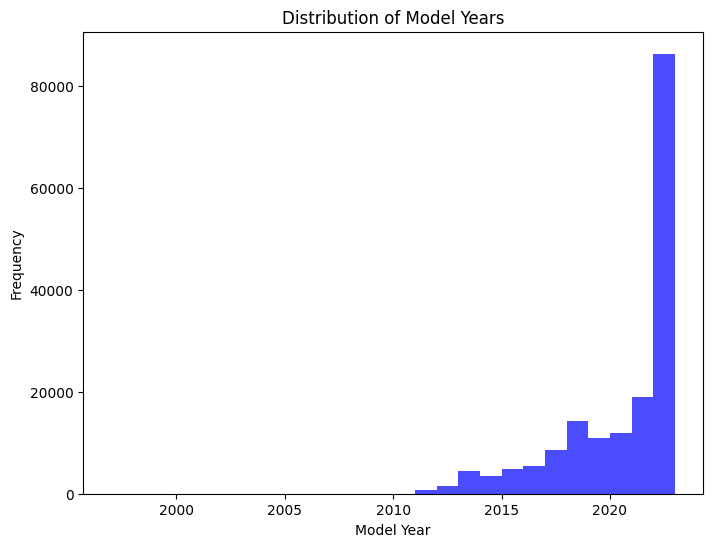

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Model Year'], bins=range(df['Model Year'].min(), df['Model Year'].max()), color='blue', alpha=0.7)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

plt.show()

In [28]:
# Count the number of vehicles by 'Make'
make_counts = df['Make'].value_counts()

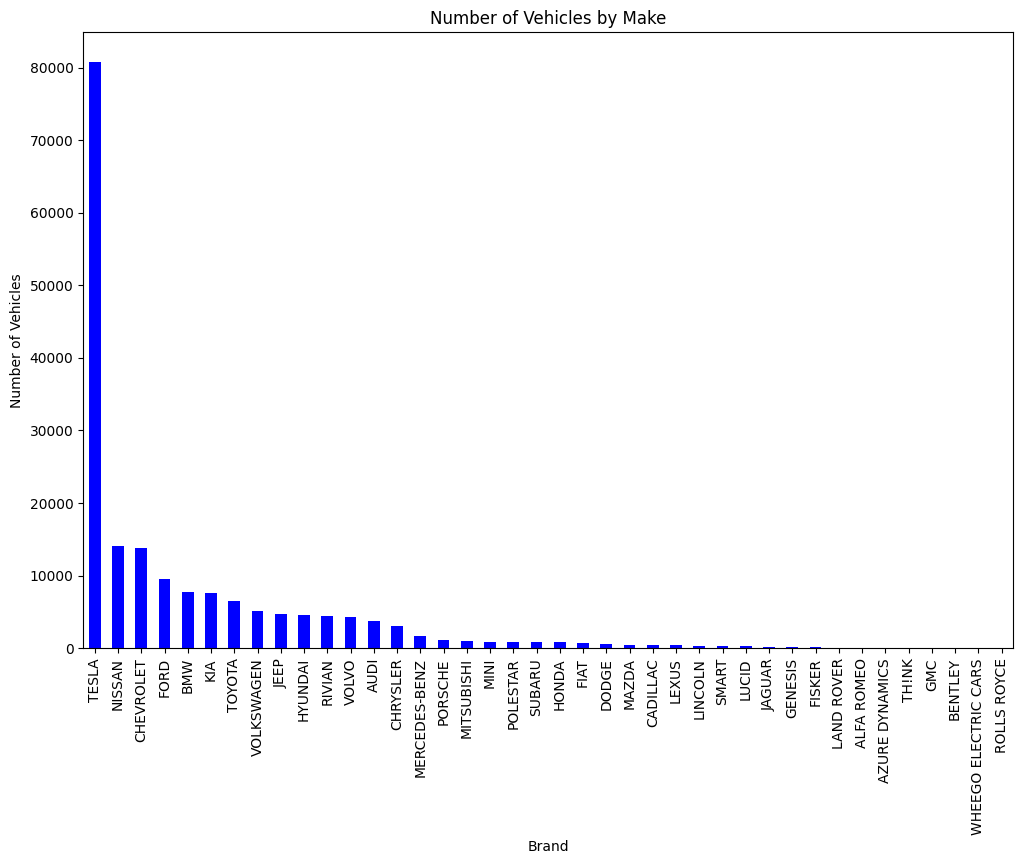

In [29]:
# Plotting a bar chart for vehicle 'Make'
plt.figure(figsize=(12, 8))
make_counts.plot(kind='bar', color='blue')
plt.title('Number of Vehicles by Make')
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

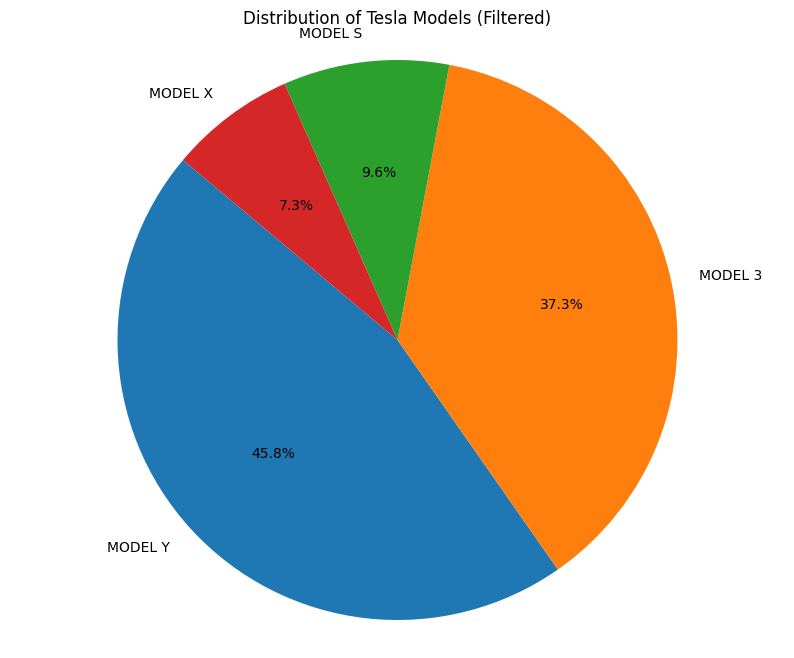

In [30]:
# Filter data for 'Tesla' make
tesla_data = df[df['Make'] == 'TESLA']

# Count the number of vehicles by 'Model' within Tesla
tesla_model_counts = tesla_data['Model'].value_counts()

# Excluding models with very low counts that might represent 0% in the pie chart
tesla_model_counts_filtered = tesla_model_counts[tesla_model_counts / tesla_model_counts.sum() > 0.01]  # Exclude less than 1% shares

# Plotting the pie chart again with filtered data
plt.figure(figsize=(10, 8))
plt.pie(tesla_model_counts_filtered, labels=tesla_model_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tesla Models (Filtered)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

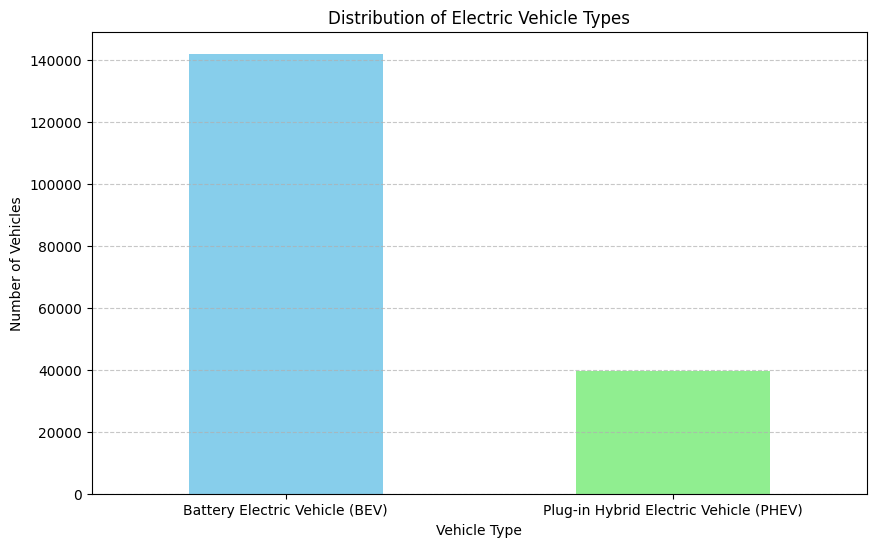

In [31]:
# Analyzing the distribution of Electric Vehicle Types
vehicle_type_counts = df['Electric Vehicle Type'].value_counts()

# Plotting the distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
vehicle_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution of electric vehicle types in your dataset shows a clear dominance of Battery Electric Vehicles (BEVs) over Plug-in Hybrid Electric Vehicles (PHEVs). This can indicate a stronger market penetration or preference for BEVs in the regions covered by the dataset.

In [32]:
# Analyzing Electric Range by Vehicle Type
range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].describe()

range_by_type

,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Battery Electric Vehicle (BEV),141973.0,65.345587,101.732642,0.0,0.0,0.0,149.0,337.0
Plug-in Hybrid Electric Vehicle (PHEV),39485.0,30.791490,15.531642,6.0,21.0,29.0,38.0,153.0


Here's a summary of the electric range statistics for each type of vehicle:

- **Battery Electric Vehicles (BEVs)**:
    - Average Range: Approximately 65 miles
    - Standard Deviation: About 102 miles, indicating significant variability
    - Range Spread: Ranges from 0 to 337 miles
- **Plug-in Hybrid Electric Vehicles (PHEVs)**:
    - Average Range: About 31 miles
    - Standard Deviation: Around 16 miles, showing less variability than BEVs
    - Range Spread: Ranges from 6 to 153 miles

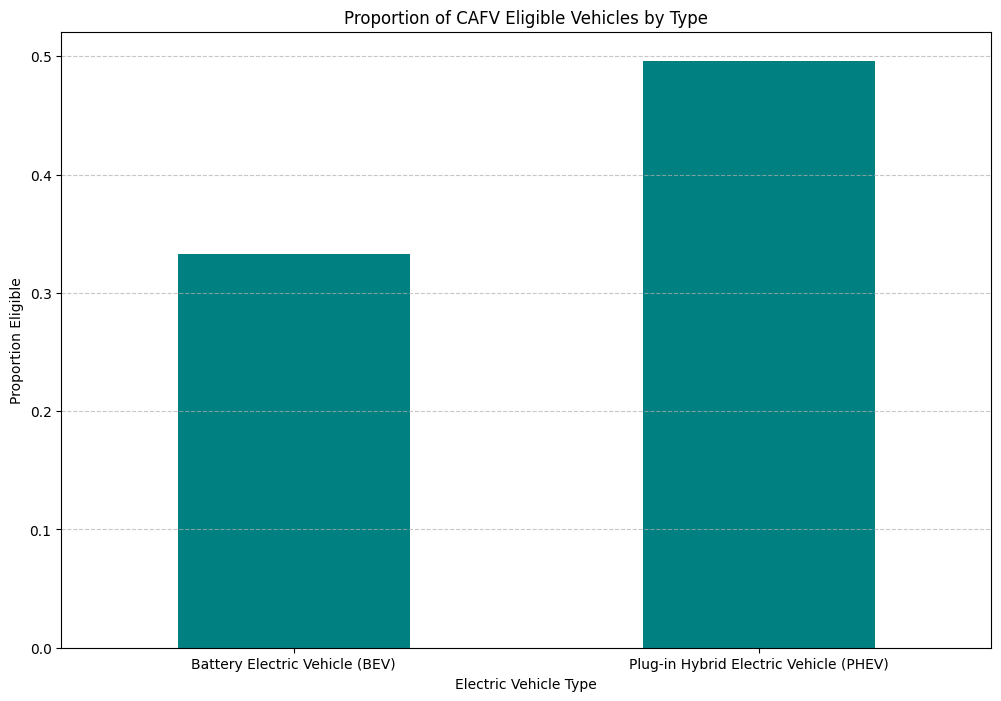

In [33]:
# Creating a crosstab to analyze the impact of vehicle type on CAFV eligibility
eligibility_crosstab = pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Adding a percentage column to show the proportion of eligible vehicles within each type
eligibility_crosstab['Eligible Proportion'] = eligibility_crosstab['Clean Alternative Fuel Vehicle Eligible'] / eligibility_crosstab.sum(axis=1)

# Plotting the data
plt.figure(figsize=(12, 8))
eligibility_crosstab['Eligible Proportion'].plot(kind='bar', color='teal')
plt.title('Proportion of CAFV Eligible Vehicles by Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Proportion Eligible')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The analysis shows the proportion of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program based on the type of electric vehicle:

- **Battery Electric Vehicles (BEVs)**:
    - 33.27% of BEVs are eligible for the CAFV program.
    - A significant number of BEVs are marked with "Eligibility unknown as battery range has not been researched," which heavily influences the eligibility proportion.
- **Plug-in Hybrid Electric Vehicles (PHEVs)**:
    - 49.59% of PHEVs are eligible, which is higher than the eligibility rate for BEVs.
    - PHEVs have a substantial proportion labeled as "Not eligible due to low battery range," but no PHEVs are in the unknown category, which may indicate more complete data or different criteria for assessing eligibility.

In [34]:
eligibility_crosstab 

Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range,Eligible Proportion
Electric Vehicle Type,,,,
Battery Electric Vehicle (BEV),47234,94730,9,0.332697
Plug-in Hybrid Electric Vehicle (PHEV),19582,0,19903,0.495935


In [35]:
eligibility_crosstab['Eligible Proportion']

Electric Vehicle Type
Battery Electric Vehicle (BEV)            0.332697
Plug-in Hybrid Electric Vehicle (PHEV)    0.495935
Name: Eligible Proportion, dtype: float64

### Economics Analysis

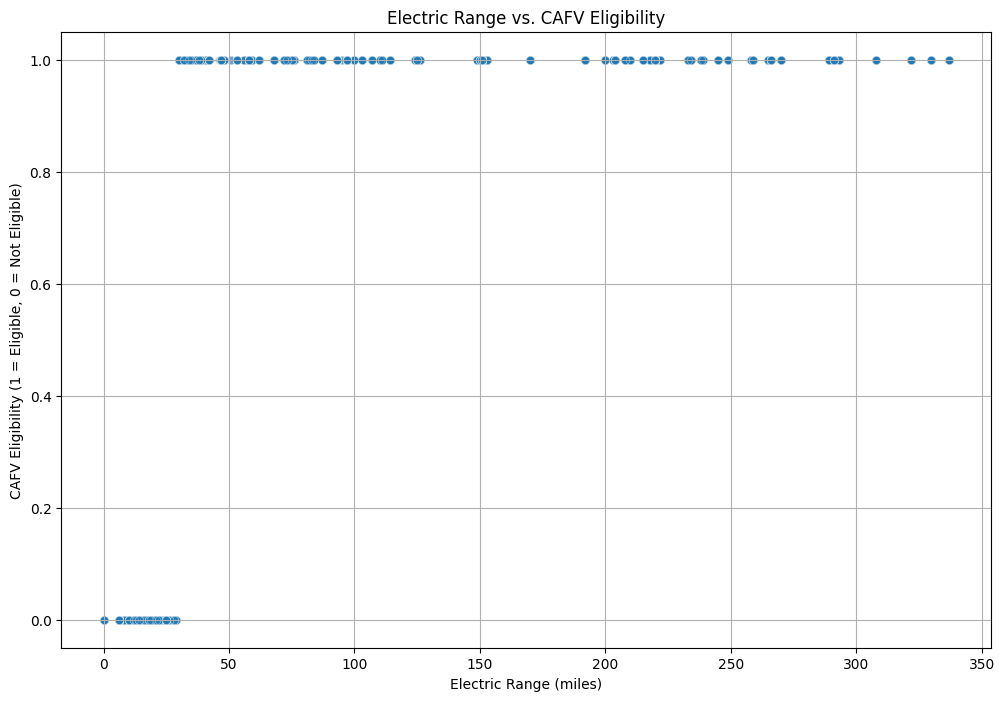

In [36]:
import seaborn as sns

# Prepare the data focusing on Electric Range and CAFV Eligibility
range_cafv_data = df[['Electric Range', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].copy()
range_cafv_data['CAFV Eligible'] = range_cafv_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(
    lambda x: 1 if 'Eligible' in x else 0)

# Scatter plot to visualize the relationship between Electric Range and CAFV Eligibility
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Range', y='CAFV Eligible', data=range_cafv_data, alpha=0.3)
plt.title('Electric Range vs. CAFV Eligibility')
plt.xlabel('Electric Range (miles)')
plt.ylabel('CAFV Eligibility (1 = Eligible, 0 = Not Eligible)')
plt.grid(True)
plt.show()

In [37]:
# Calculating correlation
correlation = range_cafv_data['Electric Range'].corr(range_cafv_data['CAFV Eligible'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.778591695258414


The scatter plot and correlation analysis between electric range and CAFV eligibility show a strong positive correlation (ρ = 0.779). This suggests that as the electric range increases, the likelihood of a vehicle being eligible for the Clean Alternative Fuel Vehicle (CAFV) program also increases. This correlation can indicate that economic incentives, such as tax credits or other benefits associated with the CAFV program, are more accessible to owners of vehicles with longer electric ranges.

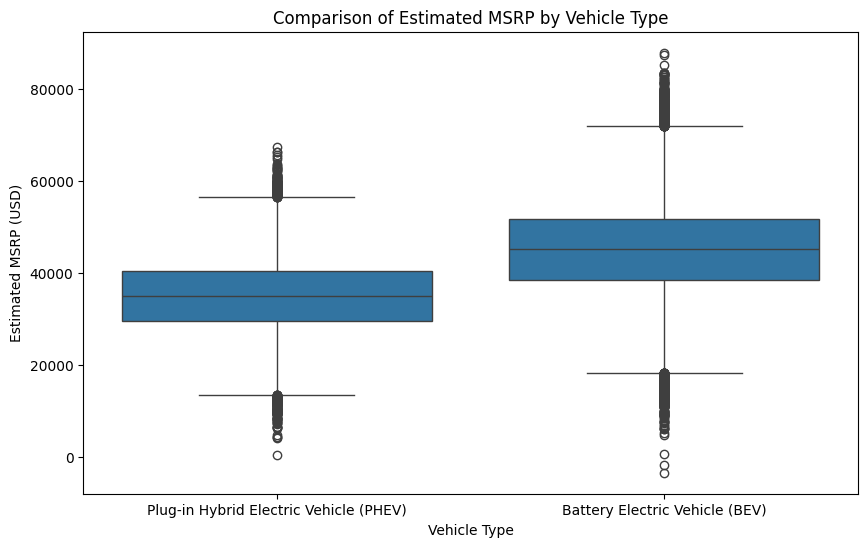

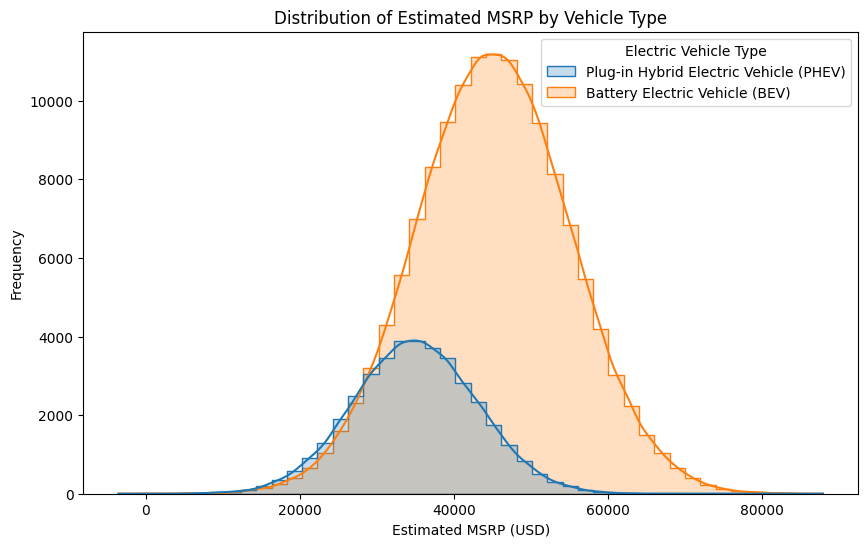

In [38]:
import numpy as np 

# Simulating MSRP data for demonstration
np.random.seed(0)
df['Estimated MSRP'] = np.where(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)',
                                np.random.normal(loc=45000, scale=10000, size=len(df)),
                                np.random.normal(loc=35000, scale=8000, size=len(df)))

# Correct way to replace inf/-inf with NaN
df['Estimated MSRP'] = df['Estimated MSRP'].replace([np.inf, -np.inf], np.nan)

# Creating a box plot to compare MSRP distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Estimated MSRP', data=df)
plt.title('Comparison of Estimated MSRP by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Estimated MSRP (USD)')
plt.show()

# Creating a histogram to view the frequency distribution of MSRPs
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Estimated MSRP', hue='Electric Vehicle Type', element='step', binwidth=2000, kde=True)
plt.title('Distribution of Estimated MSRP by Vehicle Type')
plt.xlabel('Estimated MSRP (USD)')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Calculating descriptive statistics for Estimated MSRP by Vehicle Type
msrp_stats_by_type = df.groupby('Electric Vehicle Type')['Estimated MSRP'].describe()

msrp_stats_by_type

,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Battery Electric Vehicle (BEV),141973.0,45050.763081,9974.169172,-3521.176532,38315.310052,45050.270087,51764.80130,87858.556412
Plug-in Hybrid Electric Vehicle (PHEV),39485.0,34978.572914,8014.724239,244.090975,29572.936142,34932.016726,40344.46996,67445.737648


- BEVs tend to be priced higher on average compared to PHEVs, which is consistent with the market understanding that BEVs usually incorporate more advanced battery technology and longer ranges.
- Variability: BEVs show a higher standard deviation, suggesting a wider range of prices within BEVs than PHEVs. This could be due to varying battery sizes, ranges, and levels of luxury and technology across different BEV models.
- The data outliers in both minimum and maximum values reflect the broad range and possible discrepancies in vehicle pricing, which in real scenarios would prompt a closer examination of the data sources or methodologies used for price estimation.

### Conclusion
The project provided valuable insights into the electric vehicle market, highlighting how different factors such as vehicle type, range influence consumer choices and market dynamics. The findings suggest that both policy and industry strategies need to be adaptive and responsive to the diverse needs and preferences within the EV market. This analysis not only helps in understanding current trends but also in predicting future developments in the realm of electric mobility. 

In [40]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect('electric_vehicle_population.db')

# Write the data into the database
df.to_sql('table_name', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()